In [3]:
pip install opencv-python

     ---------------------------------------- 0.0/38.2 MB ? eta -:--:--
     ---------------------------------------- 0.2/38.2 MB 6.3 MB/s eta 0:00:07
     ---------------------------------------- 0.5/38.2 MB 5.6 MB/s eta 0:00:07
      --------------------------------------- 0.6/38.2 MB 4.9 MB/s eta 0:00:08
      --------------------------------------- 0.8/38.2 MB 4.3 MB/s eta 0:00:09
     - -------------------------------------- 1.1/38.2 MB 4.8 MB/s eta 0:00:08
     - -------------------------------------- 1.2/38.2 MB 4.7 MB/s eta 0:00:08
     - -------------------------------------- 1.5/38.2 MB 4.7 MB/s eta 0:00:08
     - -------------------------------------- 1.6/38.2 MB 4.5 MB/s eta 0:00:09
     - -------------------------------------- 1.8/38.2 MB 4.4 MB/s eta 0:00:09
     -- ------------------------------------- 2.2/38.2 MB 4.8 MB/s eta 0:00:08
     -- ------------------------------------- 2.8/38.2 MB 5.4 MB/s eta 0:00:07
     --- ------------------------------------ 3.3/38.2 MB 5

In [4]:
import numpy as np
import pandas as pd
import matplotlib as plt
from PIL import Image
import cv2

print(numpy.__version__)
print(pandas.__version__)
print(matplotlib.__version__)

1.24.2
1.5.3
3.7.1


In [ ]:
#import cv2
#import numpy as np

img = cv2.imread('/data/slide01.jpg')

imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
tret, th =cv2.threshold(imgray, 127,255,cv2.THRESH_BINARY)

temp, contours, hierachy = cv2.findContours(th, cv2.RETR_EXTERNAL, \cv2.CHAIN_APPROX_SIMPLE)
contour = contours[0]
epsilon = 0.05 * cv2.arcLrngth(contour, True)

approx = cv2.approxPolyDF(contour, epsilon, True)
cv2.drawContours(img, [contour], -1, (0,255,0), 3)
cv2.drawContours(img2, [approx], -1, (0,255,0), 3)
cv2.imshpw('contour', img)
cv2.imshpw('approx', img2)
cv2.waitkey()
cv2.destroyAllWindows()


In [9]:
#from PIL import Image
#import cv2

#import numpy as np

# 매칭을 위한 이미지 읽기
target = cv2.imread('data/4star.jpg') # 매칭 대상
shapes = cv2.imread('data/shapes.jpg') # 여러 도형
# 그레이 스케일 변환
targetGray = cv2.cvtColor(target, cv2.COLOR_BGR2GRAY)
shapesGray = cv2.cvtColor(shapes, cv2.COLOR_BGR2GRAY)
# 바이너리 스케일 변환
ret, targetTh = cv2.threshold(targetGray, 127, 255, cv2.THRESH_BINARY_INV)
ret, shapesTh = cv2.threshold(shapesGray, 127, 255, cv2.THRESH_BINARY_INV)
# 컨투어 찾기
cntrs_target, _ = cv2.findContours(targetTh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cntrs_shapes, _ = cv2.findContours(shapesTh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 각 도형과 매칭을 위한 반복문
matchs = [] # 컨투어와 매칭 점수를 보관할 리스트
for contr in cntrs_shapes:
    # 대상 도형과 여러 도형 중 하나와 매칭 실행 ---①
    match = cv2.matchShapes(cntrs_target[0], contr, cv2.CONTOURS_MATCH_I2, 0.0)
    # 해당 도형의 매칭 점수와 컨투어를 쌍으로 저장 ---②
    matchs.append( (match, contr) )
    # 해당 도형의 컨투어 시작지점에 매칭 점수 표시 ---③
    cv2.putText(shapes, '%.2f'%match, tuple(contr[0][0]),\
                    cv2.FONT_HERSHEY_PLAIN, 1,(0,0,255),1 )
# 매칭 점수로 정렬 ---④
matchs.sort(key=lambda x : x[0])
# 가장 적은 매칭 점수를 얻는 도형의 컨투어에 선 그리기 ---⑤
cv2.drawContours(shapes, [matchs[0][1]], -1, (0,255,0), 3)
cv2.imshow('target', target)
cv2.imshow('Match Shape', shapes)
cv2.waitKey()
cv2.destroyAllWindows()

False True


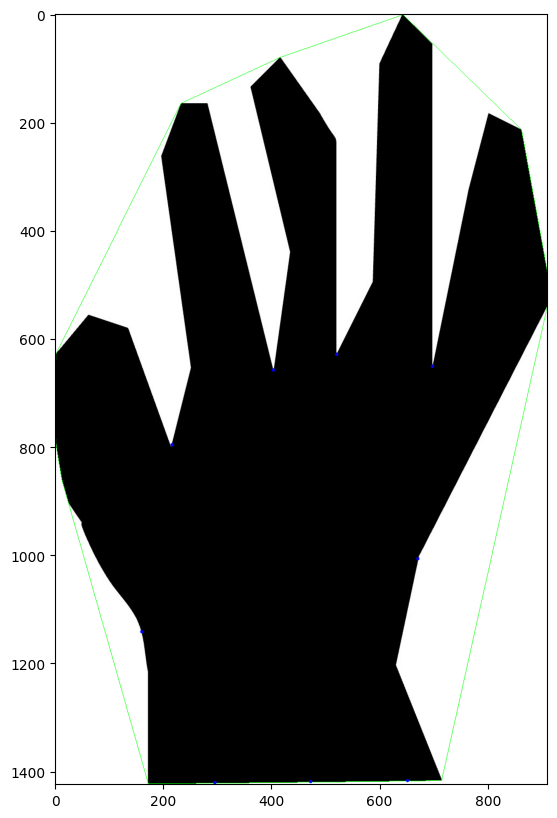

In [19]:
# 볼록 선체 (cntr_convexhull.py)

import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('data/hand.jpg')
img2 = img.copy()
# 그레이 스케일 및 바이너리 스케일 변환 ---①
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, th = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# 컨투어 찾기와 그리기 ---②
#temp, contours, heiarchy = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours, _ = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # _로 수정했음
cntr = contours[0]
cv2.drawContours(img, [cntr], -1, (0, 255,0), 1)

# 볼록 선체 찾기(좌표 기준)와 그리기 ---③
hull = cv2.convexHull(cntr)
cv2.drawContours(img2, [hull], -1, (0,255,0), 1)
# 볼록 선체 만족 여부 확인 ---④
print(cv2.isContourConvex(cntr), cv2.isContourConvex(hull))

# 볼록 선체 찾기(인덱스 기준) ---⑤
hull2 = cv2.convexHull(cntr, returnPoints=False)
# 볼록 선체 결함 찾기 ---⑥
defects = cv2.convexityDefects(cntr, hull2)
# 볼록 선체 결함 순회
for i in range(defects.shape[0]):
    # 시작, 종료, 가장 먼 지점, 거리 ---⑦
    startP, endP, farthestP, distance = defects[i, 0]
    # 가장 먼 지점의 좌표 구하기 ---⑧
    farthest = tuple(cntr[farthestP][0])
    # 거리를 부동 소수점으로 변환 ---⑨
    dist = distance/256.0
    # 거리가 1보다 큰 경우 ---⑩
    if dist > 1 :
        # 빨강색 점 표시 
        cv2.circle(img2, farthest, 3, (0,0,255), -1)
# 결과 이미지 표시
cv2.imshow('contour', img)
cv2.imshow('convex hull', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

#pil_image = Image.open("data/beatles01.jpg")
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)


plt.imshow()

#plt.imshow(img)